In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
import os
import librosa
import numpy as np

In [209]:
#Loading the dataset
data_dir = 'Datasets'
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [210]:
# Extract features for each audio file and save to a list
all_features = []
all_labels = []
for genre in genres:
    genre_dir = os.path.join(data_dir, genre)
    for file in os.listdir(genre_dir):
        if file.endswith('.wav'):
            file_path = os.path.join(genre_dir, file)
            y, sr = librosa.load(file_path)
            mfccs = librosa.feature.mfcc(y=y, sr=sr)
            spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
            mean_spectral_centroids = np.mean(spectral_centroids)
            spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
            mean_spectral_contrast = np.mean(spectral_contrast)
            spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            mean_spectral_bandwidth = np.mean(spectral_bandwidth)
            zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
            mean_zero_crossing_rate = np.mean(zero_crossing_rate)
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            duration = librosa.get_duration(y=y, sr=sr)
            onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
            onset_times = librosa.frames_to_time(onset_frames, sr=sr)
            offset_frames = onset_frames + len(mfccs.T) - onset_frames[-1] - 1
            offset_times = librosa.frames_to_time(offset_frames, sr=sr)
            tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
            beat_times = librosa.frames_to_time(beat_frames, sr=sr)

            # Save features and label to the list
            features = [mean_spectral_centroids, mean_spectral_contrast, mean_spectral_bandwidth, 
                        mean_zero_crossing_rate, duration, tempo]
            for i in range(mfccs.shape[0]):
                features.append(np.mean(mfccs[i]))
            for i in range(chroma_stft.shape[0]):
                features.append(np.mean(chroma_stft[i]))
            all_features.append(features)
            all_labels.append(genre)


In [211]:
#Extract MFCCs features
print(mfccs)

[[-19.68738     2.8178556   3.9519265 ...  -5.1528087  13.680553
   13.779724 ]
 [ 78.17187    73.89757    77.438354  ...  41.33793    50.402702
   55.59323  ]
 [ -7.348014   -7.0563903 -14.80068   ...  -3.9805753 -13.475165
  -14.9998045]
 ...
 [ -5.0756063  -7.1226425 -13.757021  ...   4.2020373   6.514286
    4.661557 ]
 [ -2.812224   -3.0428908 -10.492716  ...  -2.0236466  -6.1519823
   -4.9310913]
 [ -8.403221   -9.867044  -16.208199  ...  -8.064233   -7.1056323
   -2.8370023]]


In [212]:
#Extract spectral centroid features
print(spectral_centroids)

[[2661.51676163 2790.14559734 2684.77155126 ... 3641.76382121
  3346.51559223 3169.36112321]]


In [213]:
#Extract spectral contrast
print(spectral_contrast)

[[ 8.6452366  14.41711772 27.33844474 ... 24.3426082  19.24777551
  16.73248787]
 [ 7.07768491 10.79509716 14.6011672  ... 13.40714419 10.54274903
  15.55742473]
 [13.60164223 12.51920524 13.65233956 ... 15.21842085 17.32969948
  18.80957785]
 ...
 [14.71312845 16.88550942 15.53247233 ... 18.4625668  19.17850503
  16.81829284]
 [16.91480144 15.98869291 14.74058898 ... 16.10626325 13.98081736
  13.47507273]
 [19.61220885 20.88297474 22.63357796 ... 20.3163274  22.77421521
  18.74668045]]


In [214]:
#Extract spectral bandwidth
print(spectral_bandwidth)

[[2731.251089   2677.02979644 2555.25850225 ... 2816.60929269
  2731.20922853 2698.84820655]]


In [215]:
#Extract zero crossing rate
print(zero_crossing_rate)

[[0.05908203 0.08935547 0.11816406 ... 0.21582031 0.18359375 0.12939453]]


In [216]:
#Extract chroma stft
print(chroma_stft)

[[0.04766688 0.02604236 0.03291427 ... 0.58704823 0.43883327 0.3661012 ]
 [0.05309975 0.03963569 0.04716121 ... 1.         0.54560673 0.26684055]
 [0.14429536 0.17554665 0.21268313 ... 0.43915364 0.2036469  0.13033298]
 ...
 [1.         1.         0.73328865 ... 0.41698146 0.29195052 0.23357831]
 [0.4486111  0.4575778  1.         ... 0.33271942 0.7628329  0.9326315 ]
 [0.06428986 0.03099527 0.16957472 ... 0.44555926 1.         1.        ]]


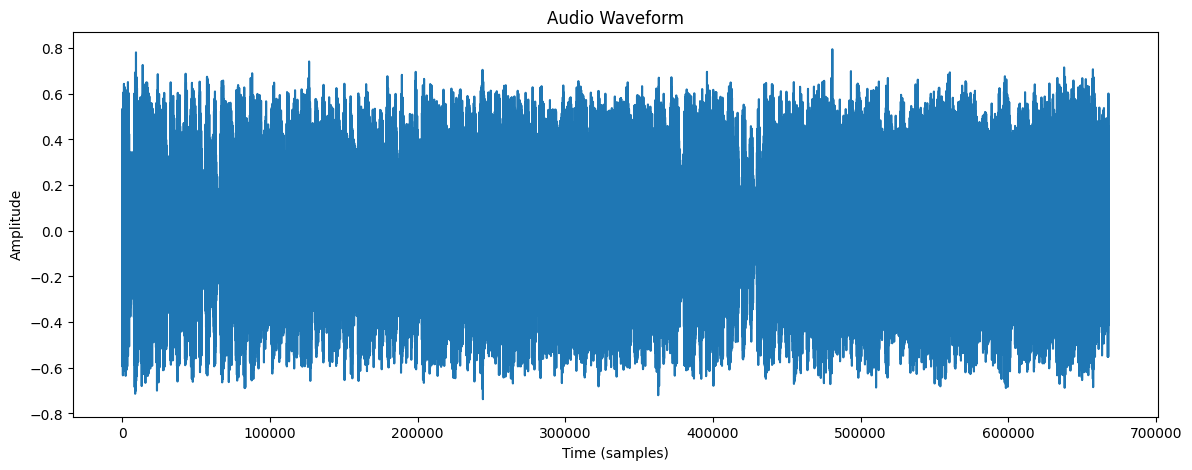

In [217]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Audio Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()


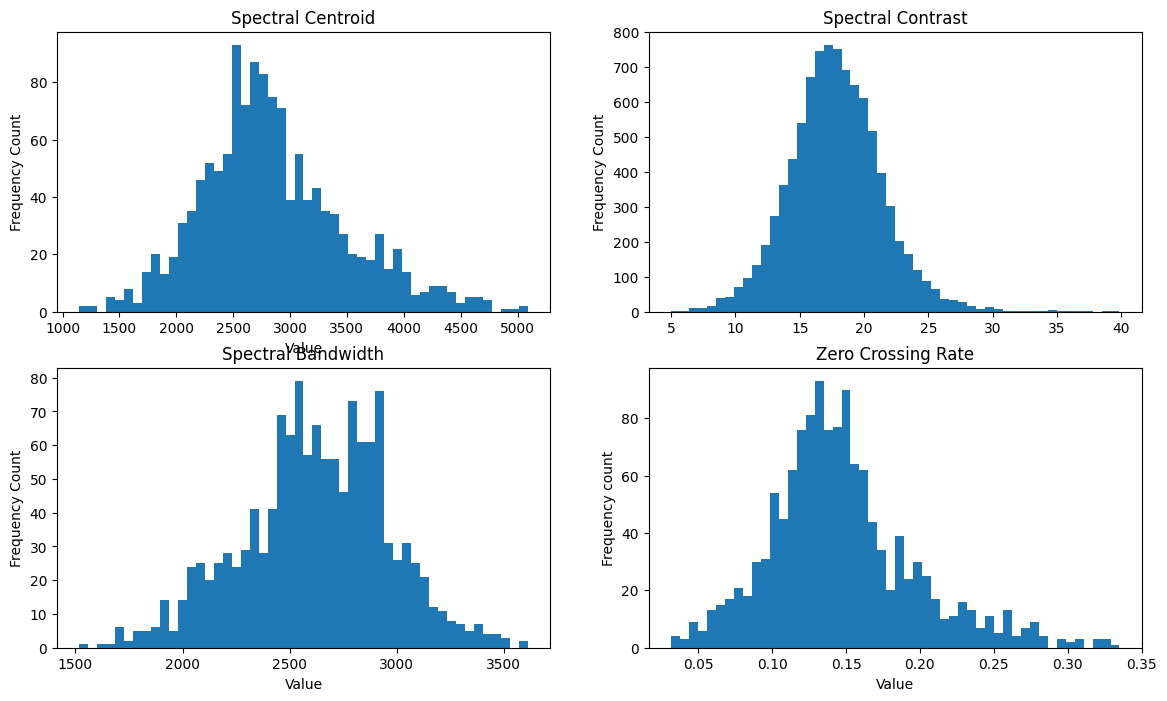

In [218]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
axs = axs.flatten()

axs[0].hist(spectral_centroids.ravel(), bins=50)
axs[0].set_title('Spectral Centroid')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency Count')


axs[1].hist(spectral_contrast.ravel(), bins=50)
axs[1].set_title('Spectral Contrast')
axs[1].set_xlabel('')
axs[1].set_ylabel('Frequency Count')

axs[2].hist(spectral_bandwidth.ravel(), bins=50)
axs[2].set_title('Spectral Bandwidth')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Frequency Count')

axs[3].hist(zero_crossing_rate.ravel(), bins=50)
axs[3].set_title('Zero Crossing Rate')
plt.xlabel('Value')
plt.ylabel('Frequency count')
plt.show()

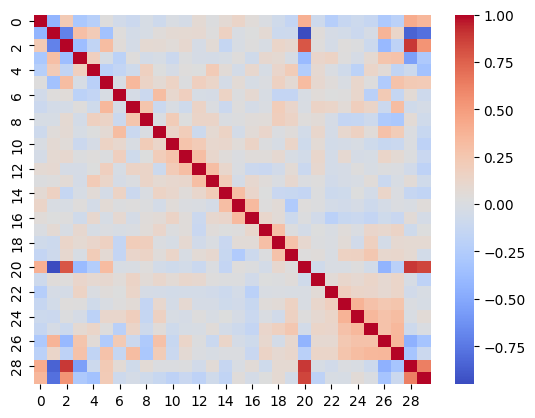

In [219]:
import seaborn as sns

# Create correlation matrix
X = np.vstack([mfccs, spectral_centroids, spectral_contrast, spectral_bandwidth, zero_crossing_rate])
corr_matrix = np.corrcoef(X)

# Plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

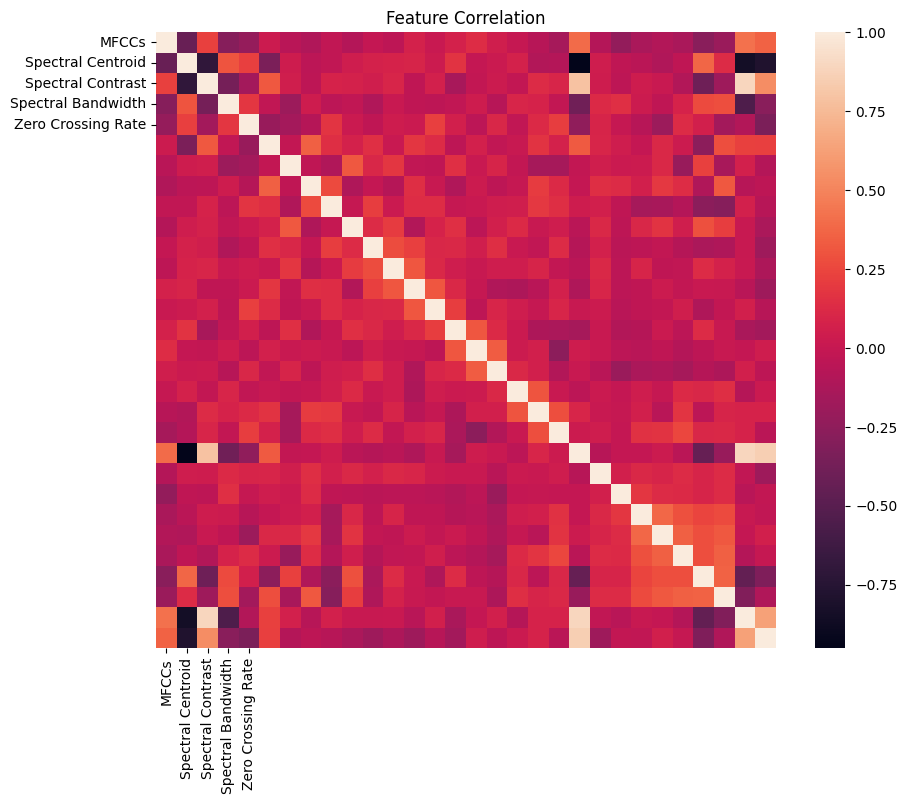

In [220]:
import seaborn as sns

features = np.vstack([mfccs, spectral_centroids, spectral_contrast, spectral_bandwidth, zero_crossing_rate])
corr = np.corrcoef(features)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=['MFCCs', 'Spectral Centroid', 'Spectral Contrast', 'Spectral Bandwidth', 'Zero Crossing Rate'],
            yticklabels=['MFCCs', 'Spectral Centroid', 'Spectral Contrast', 'Spectral Bandwidth', 'Zero Crossing Rate'])
plt.title('Feature Correlation')
plt.show()

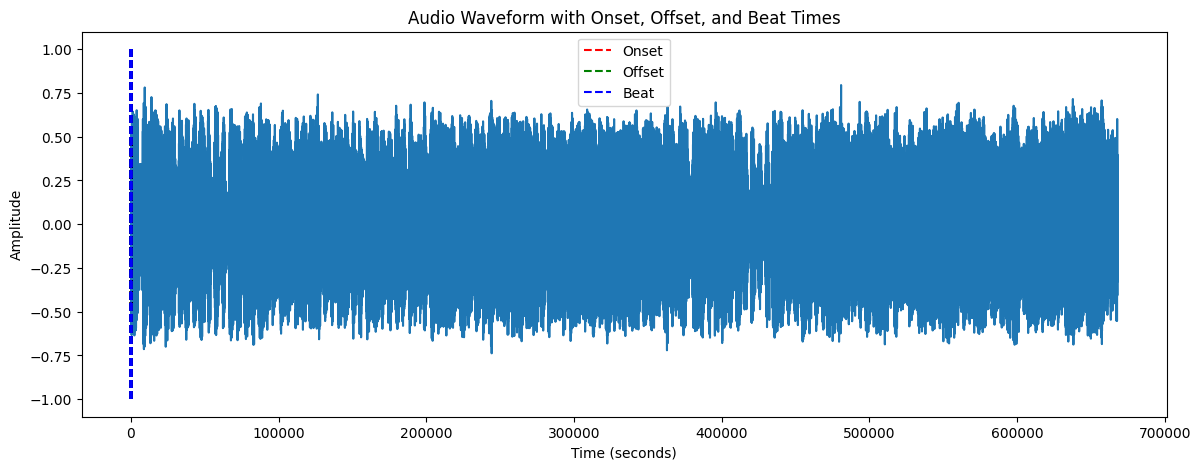

Tempo: 135.99917763157896
Onset Times: [ 0.06965986  0.20897959  0.37151927  0.41795918  0.62693878  0.85913832
  1.06811791  1.30031746  1.50929705  1.71827664  1.85759637  1.95047619
  2.18267574  2.39165533  2.57741497  2.62385488  2.80961451  2.85605442
  3.0185941   3.06503401  3.29723356  3.50621315  3.7384127   3.94739229
  4.20281179  4.38857143  4.59755102  4.85297052  5.08517007  5.27092971
  5.31736961  5.50312925  5.66566893  5.96752834  6.17650794  6.38548753
  6.61768707  6.80344671  7.03564626  7.2678458   7.50004535  7.70902494
  7.91800454  8.15020408  8.35918367  8.56816327  9.0093424   9.19510204
  9.24154195  9.4737415   9.70594104  9.91492063  9.96136054 10.12390023
 10.37931973 10.58829932 10.79727891 10.98303855 11.28489796 11.49387755
 11.7260771  11.95827664 12.16725624 12.39945578 12.60843537 12.84063492
 13.07283447 13.30503401 13.51401361 13.93197279 13.9784127  14.39637188
 14.62857143 15.32517007 15.74312925 15.99854875 16.2307483  16.41650794
 16.64870748

In [221]:
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.vlines(onset_times, ymin=-1, ymax=1, color='r', linestyle='--', label='Onset')
plt.vlines(offset_times, ymin=-1, ymax=1, color='g', linestyle='--', label='Offset')
plt.vlines(beat_times, ymin=-1, ymax=1, color='b', linestyle='--', label='Beat')
plt.title('Audio Waveform with Onset, Offset, and Beat Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

print('Tempo:', tempo)
print('Onset Times:', onset_times)
print('Offset Times:', offset_times)
print('Beat Times:', beat_times)

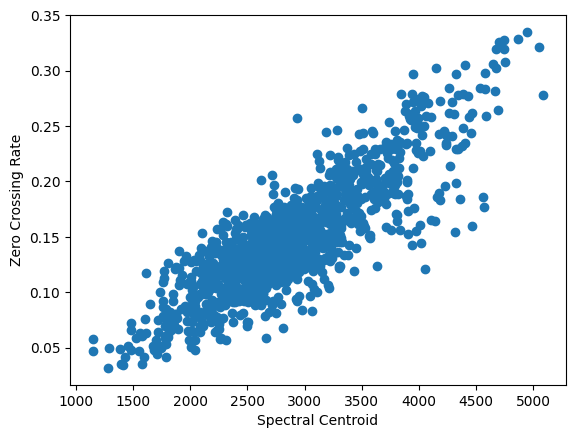

In [222]:
import matplotlib.pyplot as plt

plt.scatter(spectral_centroids, zero_crossing_rate)
plt.xlabel('Spectral Centroid')
plt.ylabel('Zero Crossing Rate')
plt.show()

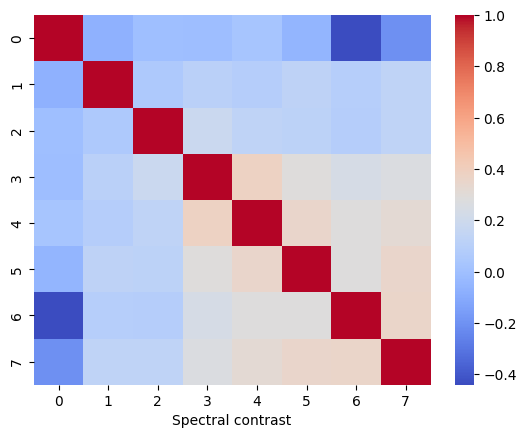

In [223]:
import seaborn as sns

# Create correlation matrix
X = np.vstack([spectral_centroids, spectral_contrast])
corr_matrix = np.corrcoef(X)

# Plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.xlabel('Spectral centroid')
plt.xlabel('Spectral contrast')
plt.show()

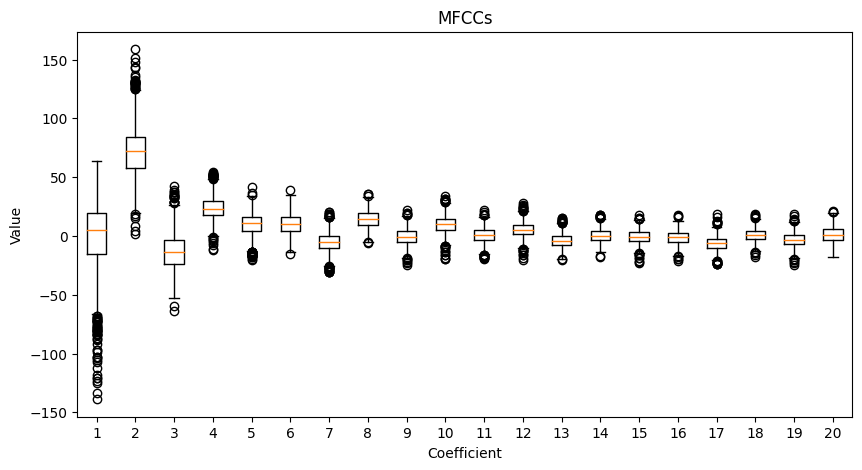

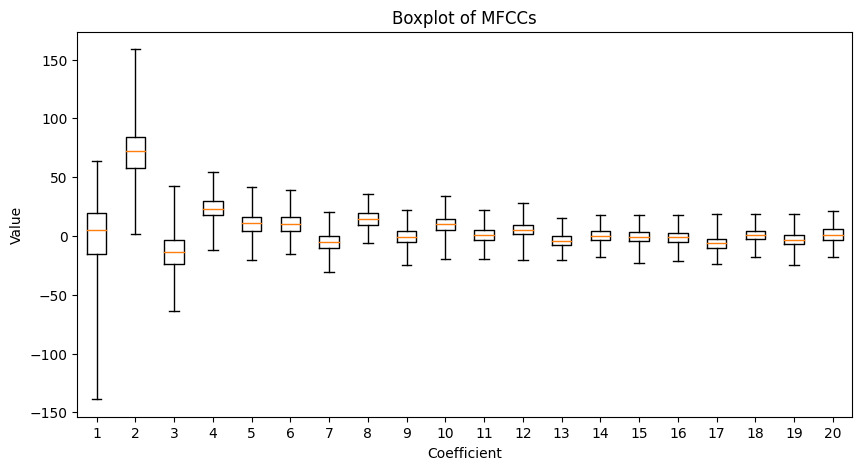

In [224]:
import matplotlib.pyplot as plt

# Draw a boxplot for the MFCCs
plt.figure(figsize=(10, 5))
plt.boxplot(mfccs.T)
plt.title('MFCCs')
plt.xlabel('Coefficient')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(mfccs.T, whis=6)
plt.title('Boxplot of MFCCs')
plt.xlabel('Coefficient')
plt.ylabel('Value')
plt.show()

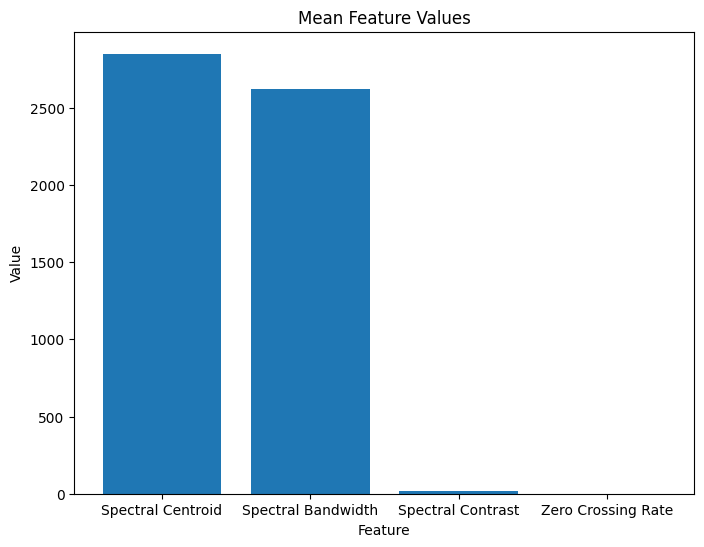

In [225]:
import matplotlib.pyplot as plt

# Define data and labels
data = [mean_spectral_centroids, mean_spectral_bandwidth, mean_spectral_contrast, mean_zero_crossing_rate]
labels = ['Spectral Centroid', 'Spectral Bandwidth', 'Spectral Contrast', 'Zero Crossing Rate']

# Create barplot
plt.figure(figsize=(8, 6))
plt.bar(labels, data)
plt.title('Mean Feature Values')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

In [226]:
import numpy as np

X = np.array(all_features)
y = np.array(all_labels)


In [232]:
 from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
from sklearn.ensemble import RandomForestClassifier

# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
accuracy = rf.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 76.25%


In [229]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
selector = SelectFromModel(RandomForestClassifier(random_state=42))
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)
best_rf = grid_search.best_estimator_

# Evaluate the accuracy of the classifier
accuracy = best_rf.score(X_test_selected, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 71.25%


In [234]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline

# Feature selection
selector = SelectFromModel(SVC(kernel='linear', C=1.0))
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a pipeline to scale the selected features and train the SVM classifier
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10, gamma=0.1))

# Train the SVM classifier using the pipeline
svm_pipeline.fit(X_train_selected, y_train)

# Evaluate the accuracy of the classifier on the test set
accuracy = svm_pipeline.score(X_test_selected, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 66.25%


In [233]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline to scale the features and train the SVM classifier
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10, gamma=0.1))

# Train the SVM classifier using the pipeline
svm_pipeline.fit(X_train, y_train)

# Evaluate the accuracy of the classifier on the test set
accuracy = svm_pipeline.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 65.00%


In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Train the model on the dataset X_scaled and target y with adjusted C
clf = LogisticRegression(C=0.01)  # Adjust the regularization parameter C
clf.fit(X_scaled, y)

# Get the predicted class labels for the testing set
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 65.00%


In [239]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# create Decision Tree classifier and fit the model on training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# predict the test set labels
y_pred = clf.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 52.50%


In [240]:
from sklearn.neighbors import KNeighborsClassifier
# Train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the accuracy of the classifier
accuracy = knn.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 42.50%


In [241]:
import soundfile as sf
import librosa

# Load a sample audio file from the dataset
audio_file = 'blues.00003.wav'
audio_data, sr = librosa.load(audio_file)

# Print the shape and data type of the audio array
print('Shape:', audio_data.shape)
print('Data Type:', audio_data.dtype)

# Check the metadata associated with the audio file
info = sf.info(audio_file)
print('Sampling Rate:', info.samplerate)
print('Number of Channels:', info.channels)
print('Duration:', info.duration)



Shape: (661794,)
Data Type: float32
Sampling Rate: 22050
Number of Channels: 1
Duration: 30.013333333333332


In [243]:
import soundfile as sf
import librosa

# Load a sample audio file from the dataset
audio_file = 'classical.00009.wav'
audio_data, sr = librosa.load(audio_file)

# Print the shape and data type of the audio array
print('Shape:', audio_data.shape)
print('Data Type:', audio_data.dtype)

# Check the metadata associated with the audio file
info = sf.info(audio_file)
print('Sampling Rate:', info.samplerate)
print('Number of Channels:', info.channels)
print('Duration:', info.duration)

Shape: (661794,)
Data Type: float32
Sampling Rate: 22050
Number of Channels: 1
Duration: 30.013333333333332


In [244]:
import soundfile as sf
import librosa

# Load a sample audio file from the dataset
audio_file = 'reggae.00007.wav'
audio_data, sr = librosa.load(audio_file)

# Print the shape and data type of the audio array
print('Shape:', audio_data.shape)
print('Data Type:', audio_data.dtype)

# Check the metadata associated with the audio file
info = sf.info(audio_file)
print('Sampling Rate:', info.samplerate)
print('Number of Channels:', info.channels)
print('Duration:', info.duration)

Shape: (661794,)
Data Type: float32
Sampling Rate: 22050
Number of Channels: 1
Duration: 30.013333333333332
